# Read in the data

In [19]:
import pandas as pd

raw_data = pd.read_csv("sp.csv") # read in our table file

raw_data.head() # 

,Concentration,Absorbance
0,0.1,0.323
1,0.2,0.521
2,0.3,0.981
3,0.4,1.243
4,0.5,1.478


In [20]:
absorbance = raw_data["Absorbance"] # Getting a Columm

absorbance.head()

0    0.323
1    0.521
2    0.981
3    1.243
4    1.478
Name: Absorbance, dtype: float64

# Plotting Absorbance against Concentration

Sum of squares 0.015138545500000013


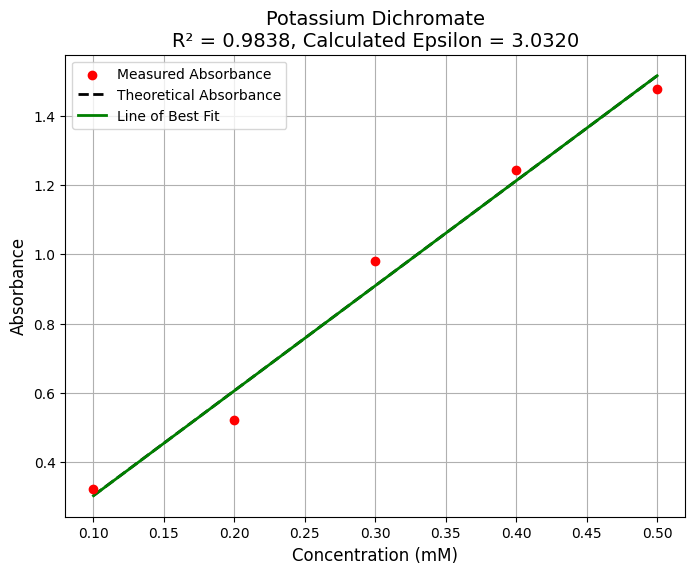

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd


# Constants for the Beer-Lambert equation
epsilon = 3.032  # Published epsilon value (Replaced with trendline Published val = 3.)
path_length = 1  # Path length in cm (assumed to be 1 cm)

# Calculate predicted absorbance using Beer-Lambert equation: A = epsilon * C * L
predicted_absorbance = [epsilon * conc_val * path_length for conc_val in raw_data['Concentration']]


# Add the predicted absorbance as a new column to raw_data
raw_data['Predicted Absorbance'] = predicted_absorbance

# Calculate the deviation squared: (absorbance - predicted absorbance)^2
raw_data['Deviation Squared'] = (raw_data['Absorbance'] - raw_data['Predicted Absorbance']) ** 2

# Calculate the sum of squares
sum_of_squares = raw_data['Deviation Squared'].sum()

print(f"Sum of squares {sum_of_squares}")

# Extract the data for the x-axis and y-axis
x = np.array(raw_data['Concentration']).reshape(-1, 1)  # Concentration values as a 2D array
y = np.array(raw_data['Absorbance'])  # Absorbance values

# Perform linear regression to calculate the line of best fit
model = LinearRegression()  # Create a linear regression model
model.fit(x, y)  # Fit the model to the experimental data
y_fit = model.predict(x)  # Calculate the line of best fit

# Extract the gradient (epsilon value)
calculated_epsilon = model.coef_[0]  # The slope of the line of best fit

# Calculate R^2 value
r_squared = model.score(x, y)  # R^2 value using the score method

# Create the figure and axis for the plot
plt.figure(figsize=(8, 6))  # Optional: Set the figure size (width, height in inches)

# Plot the experimental data points
plt.scatter(x, y, color='red', zorder=5, label='Measured Absorbance')  # Experimental points (red)

# Plot the theoretical straight line (black)
plt.plot(x, predicted_absorbance, color='black', linestyle='--', label='Theoretical Absorbance', linewidth=2)

# Plot the line of best fit (green)
plt.plot(x, y_fit, color='green', linestyle='-', label='Line of Best Fit', linewidth=2)

# Add a title to the graph with R^2 value and calculated epsilon
plt.title(f'Potassium Dichromate\nR² = {r_squared:.4f}, Calculated Epsilon = {calculated_epsilon:.4f}', fontsize=14)

# Label the x-axis and y-axis
plt.xlabel('Concentration (mM)', fontsize=12)
plt.ylabel('Absorbance', fontsize=12)

# Add a legend (useful for identifying data in the graph)
plt.legend(fontsize=10)

# Add a grid to make the graph easier to read
plt.grid(True)

# Display the plot
plt.show()


# Fitting a straight line